In [4]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas
%matplotlib notebook

In [2]:
data = np.genfromtxt("build/out/stats.csv", skip_header=1, delimiter=',')
data[:, 2] -= data[0, 1]
data[:, 1] -= data[0, 1]

In [58]:
df = pandas.read_csv("build/out/stats.csv", skipinitialspace=True)
df = df.drop('Unnamed: 10', axis= 1)
time_min = df['starttime'].min()
df['starttime'] -= time_min
df['endtime'] -= time_min
df.head()

,rank,starttime,endtime,time_comp,time_send,time_recv,time_idle,stats_nb_send,stats_nb_recv,nb_cycles
0,0,0.002979,0.107950,0.039316,0.001267,0.000899,0.063489,16,39,51
1,0,0.107950,0.209553,0.067965,0.000406,0.000752,0.032480,24,56,39
2,0,0.209553,0.310028,0.060978,0.000386,0.000794,0.038317,20,56,33
3,0,0.310028,0.410153,0.068607,0.000434,0.000753,0.030331,24,52,39
4,0,0.410153,0.512206,0.060319,0.004265,0.000749,0.036720,18,50,33


<IPython.core.display.Javascript object>


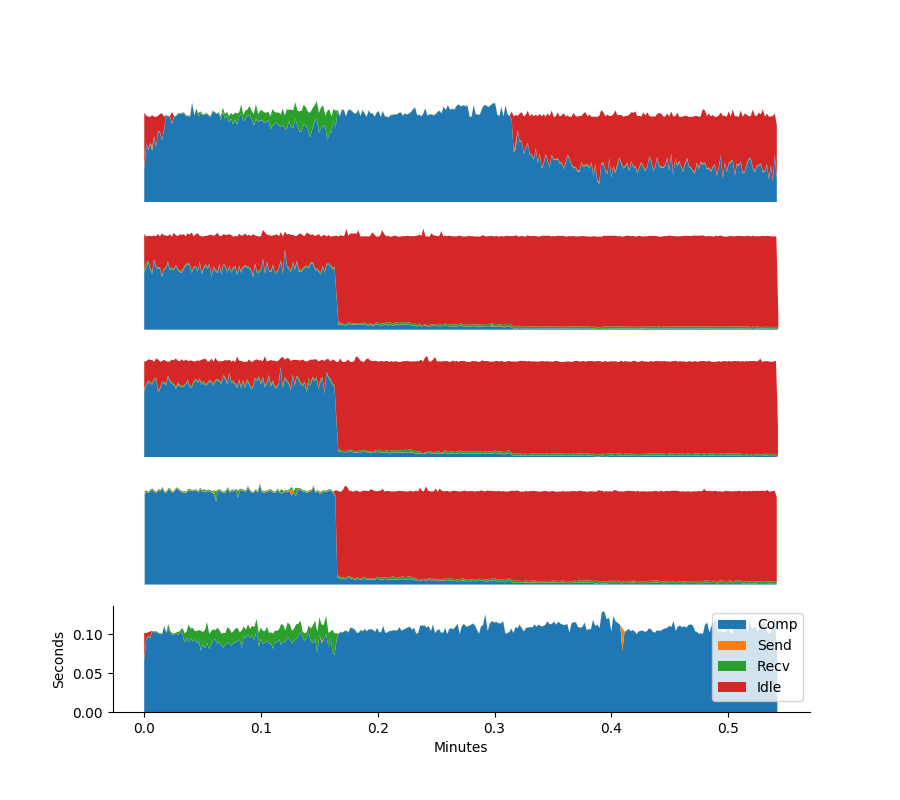

      rank  starttime    endtime  time_comp  time_send  time_recv  time_idle  \
464      1  15.468888  15.569996   0.003860   0.000386   0.003098   0.093765   
856      2  22.391541  22.491938   0.001366   0.000143   0.002460   0.096428   
932      2  30.039992  30.141070   0.001582   0.000168   0.002513   0.096816   
1110     3  15.488760  15.589592   0.003920   0.000219   0.002715   0.093978   
1178     3  22.330973  22.431828   0.002039   0.000151   0.002406   0.096259   
1275     3  32.097620  32.197934   0.001296   0.000106   0.001953   0.096959   

      stats_nb_send  stats_nb_recv  nb_cycles  
464              24             19         85  
856              14             11         85  
932              18             14         85  
1110             24             16         85  
1178             19             16         85  
1275             18             14         85  


<IPython.core.display.Javascript object>


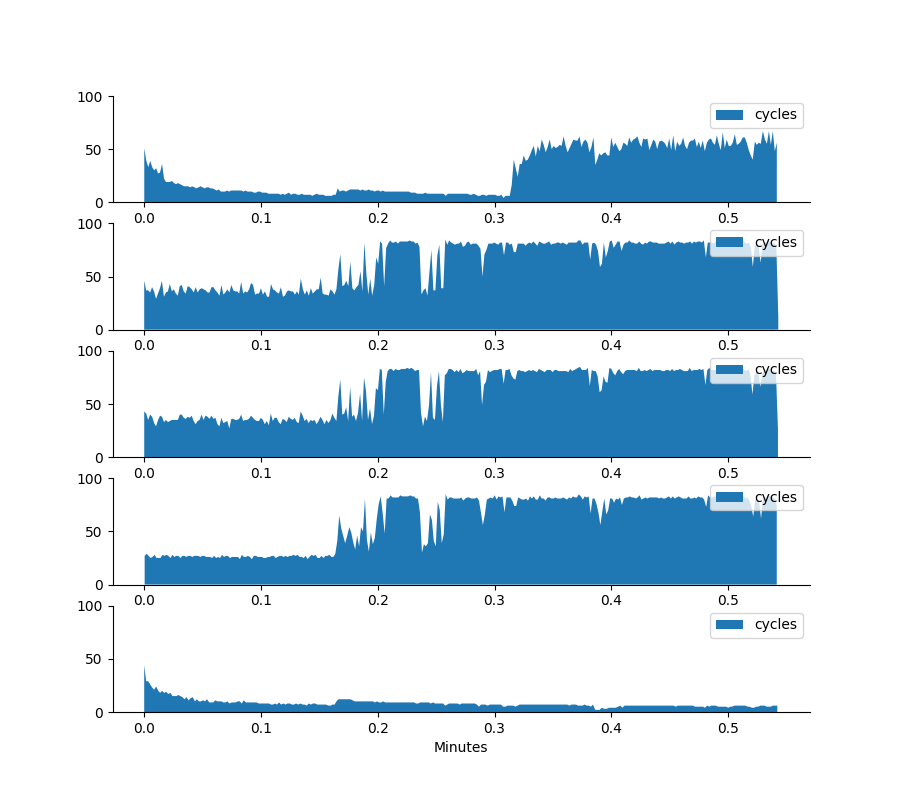

In [62]:
world_size = df['rank'].max()+1
plt.figure(figsize=(9,8/5*world_size))

for proc in range(0, world_size):
    X = df[df['rank'] == proc]
    if proc == 0:
        ax0 = plt.subplot(world_size, 1, proc+1)
    else:
        ax = plt.subplot(world_size, 1, proc+1, sharex=ax0)

    plt.stackplot(X['starttime'].values/60.0,
        X['time_comp'].values,
        X['time_send'].values,
        X['time_recv'].values,
        X['time_idle'].values,
        labels=["Comp", "Send", "Recv", "Idle"])


    if proc == world_size-1:
        plt.legend()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.xlabel("Minutes")
        # plt.ylabel("Percent")
        plt.ylabel("Seconds")
    else:
        plt.axis("off")
plt.show()

print(df[df['nb_cycles'] == df['nb_cycles'].max()])
plt.figure(figsize=(9,8/5*world_size))

for proc in range(0, world_size):
    X = df[df['rank'] == proc]
    if proc == 0:
        ax0 = plt.subplot(world_size, 1, proc+1)
        ax = ax0
    else:
        ax = plt.subplot(world_size, 1, proc+1, sharex=ax0)

    plt.stackplot(X['starttime'].values/60.0,
        X['nb_cycles'],
        labels=["cycles"])


    plt.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel("Minutes")
    ax.set_ylim([0, 100])

        
plt.show()

In [3]:
def normalize(x):
    return x / np.amax(np.abs(x))

<IPython.core.display.Javascript object>


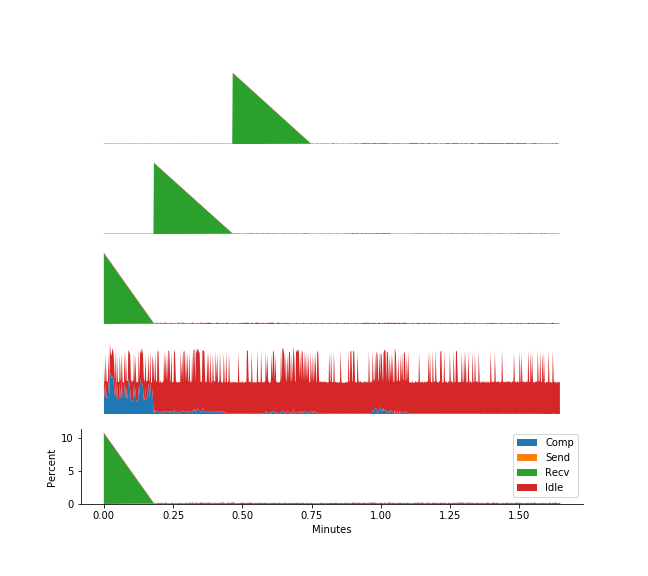

proc = 0, frac = 0.17121217060780727
proc = 1, frac = 0.17192915284150725
proc = 2, frac = 0.1090022202501395
proc = 3, frac = 0.0005904619162194761
proc = 4, frac = 0.10878213009900053


In [36]:
world_size = int(data[-1,0])+1

plt.figure(figsize=(9,8/5*world_size))


for proc in range(0, world_size):
    X = data[data[:, 0] == proc, :]
    if proc == 0:
        ax0 = plt.subplot(world_size, 1, proc+1)
    else:
        ax = plt.subplot(world_size, 1, proc+1, sharex=ax0)
    
    t_tot = np.sum(X[:, 3:], axis=1)
    plt.stackplot(X[:, 1]/60, X[:,3], X[:,4], X[:,5], X[:,6], labels=["Comp", "Send", "Recv", "Idle"])
    
    print("proc = {}, frac = {}".format(proc, np.sum(X[:, 5]) / np.sum(t_tot)))
    if proc == world_size-1:
        plt.legend()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        plt.xlabel("Minutes")
        plt.ylabel("Percent")
    else:
        plt.axis("off")

plt.show()

<IPython.core.display.Javascript object>


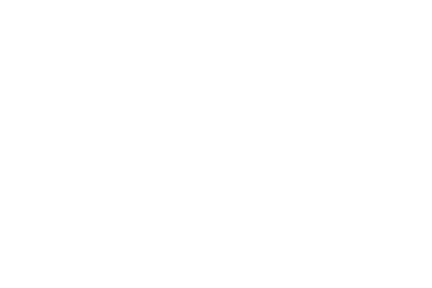

<IPython.core.display.Javascript object>


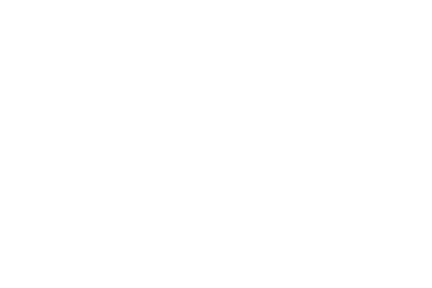

In [33]:
plt.figure()
plt.hist(data[:, 4], 100, label="send", alpha=1.0)
plt.hist(data[:, 5], 100, label="recv", alpha=0.5)
#plt.hist(data[:, 4], 100, label="idle")
plt.legend()
plt.show()

In [6]:
data.shape

(50005, 7)

In [7]:
total_seconds = 123.01243123
hours, rem = divmod(total_seconds, 60*60)
minutes, rem = divmod(rem, 60)
seconds, rem = divmod(rem, 1)
print("{:2}:{:02}:{:02}.{:02}".format(int(hours), int(minutes), int(seconds), int(rem*100)))

 0:02:03.01


In [8]:
starttime = datetime.datetime.fromtimestamp(1538639407)

<IPython.core.display.Javascript object>


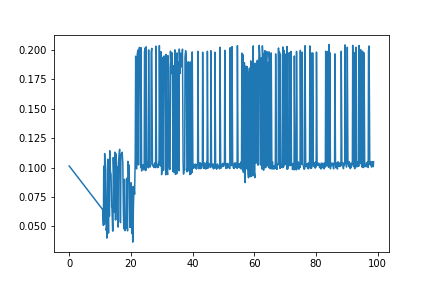

In [38]:
proc = 2
X = data[data[:, 0] == proc, :]
plt.figure()
plt.plot(X[:, 1], X[:, 6])
plt.show()